In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae import *
from KDEs import *
from toolbox import *
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u_arr = ecdf_brr(data.return_brr)
v_arr = ecdf_btc(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

In [94]:
# Moments
tau_target = [stats.kendalltau(data.return_brr, data.return_btc)[0]]
# q_arr = [0.01,0.1,0.2,0.8,0.9,.99]
q_arr = [0.05,.1,.9,0.95]
_lambda_arr = [empirical_lambda(u_arr, v_arr, q) for q in q_arr]
m_emp = np.array(tau_target+_lambda_arr)
print(m_emp)

[0.56455524 0.55813953 0.63565891 0.62015504 0.58914729]


In [95]:
#alpha beta delta
#delta --> rank 

$Loss = g g^\intercal$

$g(\theta) = \hat{m}(\theta) - m$

In [111]:
def loss(C):
    m = [C.tau()]
    for q in q_arr:
        m.append(C._lambda(q))
    g = np.array(m) - m_emp
    g = g.reshape(1,len(q_arr)+1)
    return g.dot(g.T)[0][0]

def loss1(C):
    m = [C.tau()]
    for q in q_arr:
        m.append(C._lambda(q))
    g = np.array(m) - m_emp
    g = g.reshape(1,len(q_arr)+1)
    return g

def loss2(C):
#     m = [C.tau()]
    m = []
    for q in q_arr:
        m.append(C._lambda(q))
    g = np.array(m) - m_emp[1:]
    g = g.reshape(1,len(q_arr))
    return g.dot(g.T)[0][0]

In [114]:
G = loss2(Gaussian(0.8453125, stats.uniform, stats.uniform))
# W = np.cross(G,G)

0.0018564251251993145

In [112]:
fn = lambda rho: loss2(Gaussian(rho, stats.uniform, stats.uniform))
result = scipy.optimize.fmin(fn,x0=0.8, xtol=0.0001, ftol=0.0001)
print(result)

Optimization terminated successfully.
         Current function value: 0.000625
         Iterations: 10
         Function evaluations: 20
[0.8584375]


0.8471543086172344

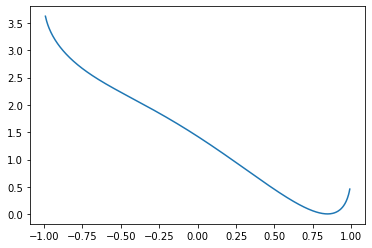

In [99]:
rho_arr = np.linspace(-.99,.99, 500)
l_arr = []
for rho in rho_arr:
    l_arr.append(fn(rho))
plt.plot(rho_arr, l_arr)
rho_arr[np.argmin(l_arr)]

In [43]:
Gaussian(0.8, stats.uniform, stats.uniform).canonical_calibrate(u_arr, v_arr)

Optimization terminated successfully.
         Current function value: -0.436606
         Iterations: 32
         Function evaluations: 68


array([0.76821375])

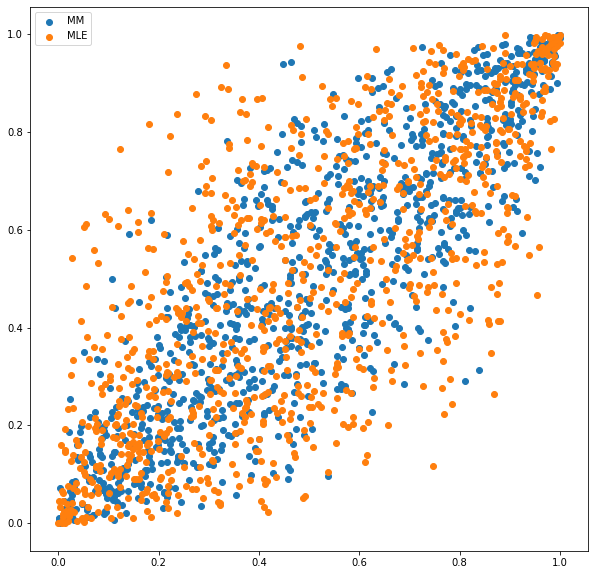

In [93]:
s0 = Gaussian(0.88, stats.uniform, stats.uniform).sample(1000)
s1 = Gaussian(0.76, stats.uniform, stats.uniform).sample(1000)

plt.figure(figsize=(10,10))
plt.scatter(s0[:,0],s0[:,1], label="MM")
plt.scatter(s1[:,0],s1[:,1], label="MLE")
plt.legend()

In [115]:
fn     = lambda para: loss(t_Copula(para[0], para[1], stats.uniform, stats.uniform))
result = scipy.optimize.fmin(fn,x0=(0.7, 4))

KeyboardInterrupt: 

In [118]:
C = t_Copula(0.2, 10, stats.uniform, stats.uniform)

0.29683677838818695

In [120]:
%%time
C._lambda(0.9)

CPU times: user 2.14 s, sys: 32.4 ms, total: 2.17 s
Wall time: 2.19 s


0.19889838031938117

In [121]:
C.canonical_calibrate(u_arr, v_arr)

Optimization terminated successfully.
         Current function value: -0.515522
         Iterations: 152
         Function evaluations: 300


array([2.        , 0.77581356])

In [51]:
%%time 
fn((0.7,10))

CPU times: user 9.26 s, sys: 42 ms, total: 9.3 s
Wall time: 9.32 s


0.2808874816650633

In [63]:
fn = lambda theta: loss(Clayton(theta, stats.uniform, stats.uniform))
result = scipy.optimize.fmin(fn,x0=10)
print(result)

AttributeError: 'Clayton' object has no attribute 'tau'

In [69]:
fn = lambda theta: loss(Frank(theta, stats.uniform, stats.uniform))
result = scipy.optimize.fmin(fn,x0=(10))
print(result)

ValueError: cannot reshape array of size 49 into shape (1,7)

In [27]:
theta_arr = np.linspace(0.1,40,500)
loss_arr = []
for theta in theta_arr:
    loss_arr.append(fn(theta))

Text(0, 0.5, 'loss')

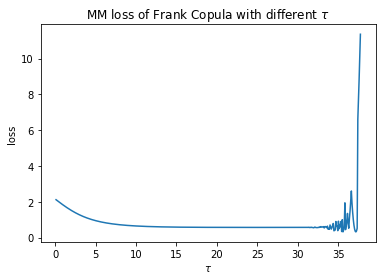

In [71]:
plt.title(r"MM loss of Frank Copula with different $\tau$")
plt.plot(theta_arr, loss_arr)
plt.xlabel(r'$\tau$')
plt.ylabel('loss')

In [ ]:
fn = lambda theta: loss(Gumbel(theta, stats.uniform, stats.uniform))
result = scipy.optimize.fmin(fn,x0=1)
print(result)

In [20]:
C = Gaussian(0.2,stats.uniform, stats.uniform)

# C = t_Copula(0.2,10,stats.uniform, stats.uniform)

# C = Clayton(0.1, stats.uniform, stats.uniform)
# C = Frank(0.1, stats.uniform, stats.uniform)
# C = Clayton(0.1, stats.uniform, stats.uniform)



samples = C.sample(1000000)
print("\nlambda from sample:",
      empirical_lambda(samples[:,0], samples[:,1],0.2),
      "\nlambda analytical :",
       C._lambda(0.2))


lambda from sample: 1.83007 
lambda analytical : 0.2840745490467395


In [21]:
C.tau()

0.12818843369794988

In [22]:
stats.kendalltau(samples[:,0], samples[:,1])[0]

0.12721208688808688

In [210]:
C1 = Gaussian( 0.90, stats.uniform, stats.uniform)
# C2 = Gaussian(-0.01, stats.uniform, stats.uniform)
C2 = Gaussian(0, stats.uniform, stats.uniform)


In [283]:
size1

73078.0

In [290]:
result = np.array([0.9263482 , 0.73078416])
C1 = Gaussian( result[0], stats.uniform, stats.uniform)
p     = result[1]
size  = len(u_arr)
size1 = int(round(size*p))
size2 = size - size1

samples = np.zeros((size,2))

samples[:size1,:] = C1.sample(size1)
samples[size1:,:] = C2.sample(size2)

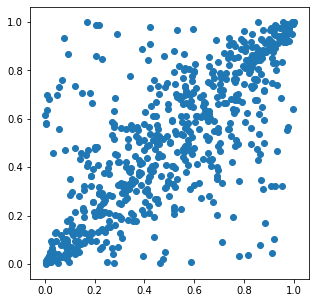

In [291]:
plt.figure(figsize=(5,5))
plt.scatter(samples[:,0], samples[:,1])

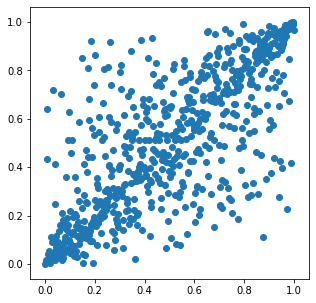

In [292]:
plt.figure(figsize=(5,5))
plt.scatter(u_arr, v_arr)

In [253]:
# test on pi! --> if pi > 0, there is idioscyratic risk

mixture_C = lambda u,v: p*C1.C(u,v) + (1-p)*C2.C(u,v)
mixture_c = lambda u,v: p*C1.c(u,v) + (1-p)*C2.c(u,v)

In [251]:
q1 = 0.9
q2 = 0.2

mixture_C(q1,q2)

0.19799996779730517

In [252]:
np.mean((samples[:,0] <=q1) & (samples[:,1] <=q2))

0.19808

In [261]:
class mixture_Copula:
    def __init__(self, C1, C2, p):
        self.C1 = C1
        self.C2 = C2
        self.p = p
    def C(self, u, v):
        return  self.p*self.C1.C(u,v) + (1-self.p)*self.C2.C(u,v)
        
    def c(self, u, v):
        return  self.p*self.C1.c(u,v) + (1-self.p)*self.C2.c(u,v)

In [278]:
def loss(rho, p, u_arr, v_arr):
    if np.abs(rho) >=0.99:
        return 5000
    if (p<0) & (p>=1):
        return 5000
    densities = []
    C1 = Gaussian(rho, stats.uniform, stats.uniform)
    # C2 = Gaussian(-0.01, stats.uniform, stats.uniform)
    C2 = Gaussian(0, stats.uniform, stats.uniform)

    for i in range(len(u_arr)):
        densities.append(mixture_Copula(C1, C2, p).c(u_arr[i], v_arr[i]))
    return -np.nanmean(np.log(np.array(densities)))

In [272]:
loss_arr =[]
p_arr = np.linspace(0,1,100)

for p in p_arr:
    loss_arr.append(loss(0.9, p, u_arr, v_arr))

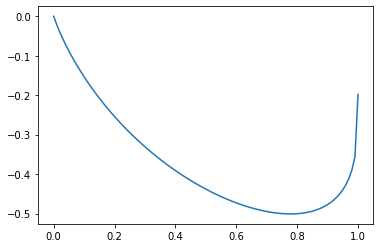

In [273]:
plt.plot(p_arr, loss_arr)

In [279]:
fn = lambda para: loss(para[0],para[1], u_arr, v_arr)

In [280]:
scipy.optimize.fmin(fn, x0=(0.5,0.5))

Optimization terminated successfully.
         Current function value: -0.505570
         Iterations: 62
         Function evaluations: 118


array([0.9263482 , 0.73078416])

In [302]:
def loss1(rho1, rho2, p, u_arr, v_arr):
    if (rho1 > 0.99) or (rho1 < 0.001):
        return 5000
    if (rho2 < -0.99) or (rho2 > -0.001):
        return 5000
    if (p<0) & (p>=1):
        return 5000
    
    densities = []
    C1 = Gaussian(rho1, stats.uniform, stats.uniform)
    C2 = Gaussian(rho2, stats.uniform, stats.uniform)

    for i in range(len(u_arr)):
        densities.append(mixture_Copula(C1, C2, p).c(u_arr[i], v_arr[i]))
    return -np.nanmean(np.log(np.array(densities)))

In [303]:
fn = lambda para: loss1(para[0],para[1], para[2], u_arr, v_arr)

In [305]:
scipy.optimize.fmin(fn, x0=(0.9,-0.9,0.5))

Optimization terminated successfully.
         Current function value: -0.505530
         Iterations: 85
         Function evaluations: 150


array([ 0.92619524, -0.00100101,  0.73194971])

In [310]:
T = t_Copula(0.9,10,stats.uniform, stats.uniform).canonical_calibrate(u_arr, v_arr, nu_lowerbound=3.9)

Optimization terminated successfully.
         Current function value: -0.503698
         Iterations: 159
         Function evaluations: 303


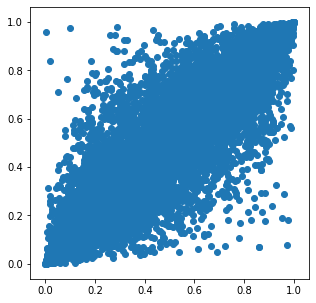

In [324]:
T = t_Copula(0.9,4,stats.uniform, stats.uniform)
s = T.sample(10000)

plt.figure(figsize=(5,5))
plt.scatter(s[:,0],s[:,1])

In [328]:
T.F_RH(h=1, r_h=0.1)

nan